Input->Linear Function->Softmax Function->Crossentropy Function 

In [1]:
import torch 
import torch.nn as nn 
import torchvision.transforms as transforms 
import torchvision.datasets as dsets 
from torch.autograd import Variable 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# create the train and tets dataset 
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [3]:
len(train_dataset)

60000

In [4]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [5]:
train_dataset[0][1]

5

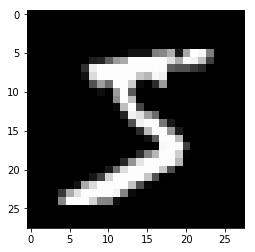

In [6]:
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='gray')

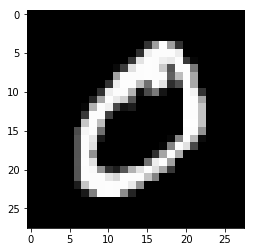

In [7]:
show_img = train_dataset[1][0].numpy().reshape(28,28)
plt.imshow(show_img,cmap='gray')

In [8]:
train_dataset[1][1]

0

In [9]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [10]:
# check iterability 
import collections
isinstance (train_loader,collections.Iterable)
# return true if iys iterable, return false if its not iterable 

True

In [11]:
# Building the model # same as linear regression 
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self,x):
        out = self.linear(x)
        return out




In [12]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [13]:
# CrossEntyropy Loss 
# Compute the softmax function => probabilities 
# Compute the crossentropy => compare probabilities with labels  
criterion = torch.nn.CrossEntropyLoss()

In [14]:
# optimizer 
learning_rate= 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
# analyse the parameters weights and bias 
print (model.parameters())
print(len(list(model.parameters())))
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x11cd63308>
2
torch.Size([10, 784])
torch.Size([10])


In [16]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
    
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        print('Iteration: {}. Loss: {} '.format(iter, loss.data[0]))

Iteration: 1. Loss: 2.352494716644287 
Iteration: 2. Loss: 2.3640356063842773 
Iteration: 3. Loss: 2.354196548461914 
Iteration: 4. Loss: 2.3588695526123047 
Iteration: 5. Loss: 2.333890914916992 
Iteration: 6. Loss: 2.36274790763855 
Iteration: 7. Loss: 2.363837480545044 
Iteration: 8. Loss: 2.3529551029205322 
Iteration: 9. Loss: 2.2979280948638916 
Iteration: 10. Loss: 2.3574304580688477 
Iteration: 11. Loss: 2.335150957107544 
Iteration: 12. Loss: 2.3416006565093994 
Iteration: 13. Loss: 2.376187324523926 
Iteration: 14. Loss: 2.3497960567474365 
Iteration: 15. Loss: 2.333223581314087 
Iteration: 16. Loss: 2.353335380554199 
Iteration: 17. Loss: 2.3529579639434814 
Iteration: 18. Loss: 2.293706178665161 
Iteration: 19. Loss: 2.3724610805511475 
Iteration: 20. Loss: 2.340538263320923 
Iteration: 21. Loss: 2.3161542415618896 
Iteration: 22. Loss: 2.3517041206359863 
Iteration: 23. Loss: 2.3183753490448 
Iteration: 24. Loss: 2.3337149620056152 
Iteration: 25. Loss: 2.355355739593506 


Iteration: 204. Loss: 2.1512815952301025 
Iteration: 205. Loss: 2.1127662658691406 
Iteration: 206. Loss: 2.1361846923828125 
Iteration: 207. Loss: 2.141376495361328 
Iteration: 208. Loss: 2.1147031784057617 
Iteration: 209. Loss: 2.145172119140625 
Iteration: 210. Loss: 2.171964168548584 
Iteration: 211. Loss: 2.159560203552246 
Iteration: 212. Loss: 2.14854097366333 
Iteration: 213. Loss: 2.1195967197418213 
Iteration: 214. Loss: 2.1374824047088623 
Iteration: 215. Loss: 2.1170990467071533 
Iteration: 216. Loss: 2.1051132678985596 
Iteration: 217. Loss: 2.103813886642456 
Iteration: 218. Loss: 2.117260456085205 
Iteration: 219. Loss: 2.119572401046753 
Iteration: 220. Loss: 2.1150081157684326 
Iteration: 221. Loss: 2.149911403656006 
Iteration: 222. Loss: 2.1192891597747803 
Iteration: 223. Loss: 2.095046043395996 
Iteration: 224. Loss: 2.1316006183624268 
Iteration: 225. Loss: 2.103111505508423 
Iteration: 226. Loss: 2.0941100120544434 
Iteration: 227. Loss: 2.129101514816284 
Itera

Iteration: 410. Loss: 1.945443868637085 
Iteration: 411. Loss: 1.9410181045532227 
Iteration: 412. Loss: 1.9640753269195557 
Iteration: 413. Loss: 1.9534715414047241 
Iteration: 414. Loss: 1.9756213426589966 
Iteration: 415. Loss: 1.938969373703003 
Iteration: 416. Loss: 1.942338466644287 
Iteration: 417. Loss: 1.9558371305465698 
Iteration: 418. Loss: 1.9651288986206055 
Iteration: 419. Loss: 1.9646803140640259 
Iteration: 420. Loss: 1.9643223285675049 
Iteration: 421. Loss: 1.9898767471313477 
Iteration: 422. Loss: 1.9203524589538574 
Iteration: 423. Loss: 1.9875296354293823 
Iteration: 424. Loss: 1.9714860916137695 
Iteration: 425. Loss: 1.925176978111267 
Iteration: 426. Loss: 1.9635155200958252 
Iteration: 427. Loss: 1.9873679876327515 
Iteration: 428. Loss: 1.9099855422973633 
Iteration: 429. Loss: 1.950187087059021 
Iteration: 430. Loss: 1.909071683883667 
Iteration: 431. Loss: 1.9270342588424683 
Iteration: 432. Loss: 1.9626175165176392 
Iteration: 433. Loss: 1.9339301586151123

Iteration: 609. Loss: 1.752515435218811 
Iteration: 610. Loss: 1.8305832147598267 
Iteration: 611. Loss: 1.8126851320266724 
Iteration: 612. Loss: 1.8193049430847168 
Iteration: 613. Loss: 1.779884696006775 
Iteration: 614. Loss: 1.8383352756500244 
Iteration: 615. Loss: 1.8366878032684326 
Iteration: 616. Loss: 1.7616478204727173 
Iteration: 617. Loss: 1.7645344734191895 
Iteration: 618. Loss: 1.8364548683166504 
Iteration: 619. Loss: 1.8007413148880005 
Iteration: 620. Loss: 1.8251054286956787 
Iteration: 621. Loss: 1.8457939624786377 
Iteration: 622. Loss: 1.8045326471328735 
Iteration: 623. Loss: 1.805423617362976 
Iteration: 624. Loss: 1.787562608718872 
Iteration: 625. Loss: 1.868177056312561 
Iteration: 626. Loss: 1.81184983253479 
Iteration: 627. Loss: 1.808271050453186 
Iteration: 628. Loss: 1.7097692489624023 
Iteration: 629. Loss: 1.781874656677246 
Iteration: 630. Loss: 1.7951472997665405 
Iteration: 631. Loss: 1.807673692703247 
Iteration: 632. Loss: 1.8027476072311401 
It

Iteration: 810. Loss: 1.6584992408752441 
Iteration: 811. Loss: 1.6785943508148193 
Iteration: 812. Loss: 1.6014307737350464 
Iteration: 813. Loss: 1.7220584154129028 
Iteration: 814. Loss: 1.7027521133422852 
Iteration: 815. Loss: 1.6994227170944214 
Iteration: 816. Loss: 1.6768766641616821 
Iteration: 817. Loss: 1.685526728630066 
Iteration: 818. Loss: 1.6341253519058228 
Iteration: 819. Loss: 1.6339008808135986 
Iteration: 820. Loss: 1.6416678428649902 
Iteration: 821. Loss: 1.6435706615447998 
Iteration: 822. Loss: 1.6516398191452026 
Iteration: 823. Loss: 1.6974639892578125 
Iteration: 824. Loss: 1.6388903856277466 
Iteration: 825. Loss: 1.6408357620239258 
Iteration: 826. Loss: 1.683703899383545 
Iteration: 827. Loss: 1.6369634866714478 
Iteration: 828. Loss: 1.6700830459594727 
Iteration: 829. Loss: 1.632900595664978 
Iteration: 830. Loss: 1.662790060043335 
Iteration: 831. Loss: 1.6314294338226318 
Iteration: 832. Loss: 1.6736239194869995 
Iteration: 833. Loss: 1.59060978889465

Iteration: 1017. Loss: 1.5147088766098022 
Iteration: 1018. Loss: 1.5302296876907349 
Iteration: 1019. Loss: 1.5615954399108887 
Iteration: 1020. Loss: 1.549422264099121 
Iteration: 1021. Loss: 1.6023037433624268 
Iteration: 1022. Loss: 1.5555044412612915 
Iteration: 1023. Loss: 1.6157407760620117 
Iteration: 1024. Loss: 1.651595115661621 
Iteration: 1025. Loss: 1.568713665008545 
Iteration: 1026. Loss: 1.5658260583877563 
Iteration: 1027. Loss: 1.5133377313613892 
Iteration: 1028. Loss: 1.5492099523544312 
Iteration: 1029. Loss: 1.5286645889282227 
Iteration: 1030. Loss: 1.6399937868118286 
Iteration: 1031. Loss: 1.6428008079528809 
Iteration: 1032. Loss: 1.5927093029022217 
Iteration: 1033. Loss: 1.5830044746398926 
Iteration: 1034. Loss: 1.568647027015686 
Iteration: 1035. Loss: 1.5816150903701782 
Iteration: 1036. Loss: 1.6032484769821167 
Iteration: 1037. Loss: 1.5534486770629883 
Iteration: 1038. Loss: 1.6334723234176636 
Iteration: 1039. Loss: 1.5933506488800049 
Iteration: 1040

Iteration: 1215. Loss: 1.462920069694519 
Iteration: 1216. Loss: 1.4911233186721802 
Iteration: 1217. Loss: 1.4761461019515991 
Iteration: 1218. Loss: 1.4387129545211792 
Iteration: 1219. Loss: 1.4805041551589966 
Iteration: 1220. Loss: 1.4792011976242065 
Iteration: 1221. Loss: 1.463564395904541 
Iteration: 1222. Loss: 1.4361586570739746 
Iteration: 1223. Loss: 1.5066008567810059 
Iteration: 1224. Loss: 1.4235749244689941 
Iteration: 1225. Loss: 1.4634441137313843 
Iteration: 1226. Loss: 1.4295424222946167 
Iteration: 1227. Loss: 1.5244144201278687 
Iteration: 1228. Loss: 1.4558697938919067 
Iteration: 1229. Loss: 1.4725923538208008 
Iteration: 1230. Loss: 1.5305255651474 
Iteration: 1231. Loss: 1.4184868335723877 
Iteration: 1232. Loss: 1.3702539205551147 
Iteration: 1233. Loss: 1.452121376991272 
Iteration: 1234. Loss: 1.5283567905426025 
Iteration: 1235. Loss: 1.4570976495742798 
Iteration: 1236. Loss: 1.488940715789795 
Iteration: 1237. Loss: 1.5049911737442017 
Iteration: 1238. L

Iteration: 1418. Loss: 1.399145245552063 
Iteration: 1419. Loss: 1.3357642889022827 
Iteration: 1420. Loss: 1.425087571144104 
Iteration: 1421. Loss: 1.3853983879089355 
Iteration: 1422. Loss: 1.3741892576217651 
Iteration: 1423. Loss: 1.3408055305480957 
Iteration: 1424. Loss: 1.444465160369873 
Iteration: 1425. Loss: 1.323887825012207 
Iteration: 1426. Loss: 1.4499090909957886 
Iteration: 1427. Loss: 1.383192539215088 
Iteration: 1428. Loss: 1.4728273153305054 
Iteration: 1429. Loss: 1.3748691082000732 
Iteration: 1430. Loss: 1.4050416946411133 
Iteration: 1431. Loss: 1.4178177118301392 
Iteration: 1432. Loss: 1.366960883140564 
Iteration: 1433. Loss: 1.3181239366531372 
Iteration: 1434. Loss: 1.3893088102340698 
Iteration: 1435. Loss: 1.3052406311035156 
Iteration: 1436. Loss: 1.3469064235687256 
Iteration: 1437. Loss: 1.4012941122055054 
Iteration: 1438. Loss: 1.3868844509124756 
Iteration: 1439. Loss: 1.3005876541137695 
Iteration: 1440. Loss: 1.4715986251831055 
Iteration: 1441. 

Iteration: 1624. Loss: 1.3227289915084839 
Iteration: 1625. Loss: 1.2093472480773926 
Iteration: 1626. Loss: 1.292819619178772 
Iteration: 1627. Loss: 1.2661038637161255 
Iteration: 1628. Loss: 1.408860445022583 
Iteration: 1629. Loss: 1.2806288003921509 
Iteration: 1630. Loss: 1.3748208284378052 
Iteration: 1631. Loss: 1.3516029119491577 
Iteration: 1632. Loss: 1.3294404745101929 
Iteration: 1633. Loss: 1.346858263015747 
Iteration: 1634. Loss: 1.2520806789398193 
Iteration: 1635. Loss: 1.3145893812179565 
Iteration: 1636. Loss: 1.2811964750289917 
Iteration: 1637. Loss: 1.3048491477966309 
Iteration: 1638. Loss: 1.2890537977218628 
Iteration: 1639. Loss: 1.248274803161621 
Iteration: 1640. Loss: 1.3043348789215088 
Iteration: 1641. Loss: 1.2455004453659058 
Iteration: 1642. Loss: 1.3773640394210815 
Iteration: 1643. Loss: 1.251082181930542 
Iteration: 1644. Loss: 1.3378978967666626 
Iteration: 1645. Loss: 1.3870962858200073 
Iteration: 1646. Loss: 1.371951937675476 
Iteration: 1647. 

Iteration: 1828. Loss: 1.2524306774139404 
Iteration: 1829. Loss: 1.2422159910202026 
Iteration: 1830. Loss: 1.2693103551864624 
Iteration: 1831. Loss: 1.3128451108932495 
Iteration: 1832. Loss: 1.2536742687225342 
Iteration: 1833. Loss: 1.2579855918884277 
Iteration: 1834. Loss: 1.2929803133010864 
Iteration: 1835. Loss: 1.2123297452926636 
Iteration: 1836. Loss: 1.3101061582565308 
Iteration: 1837. Loss: 1.3310376405715942 
Iteration: 1838. Loss: 1.264449119567871 
Iteration: 1839. Loss: 1.2198569774627686 
Iteration: 1840. Loss: 1.2668826580047607 
Iteration: 1841. Loss: 1.2672417163848877 
Iteration: 1842. Loss: 1.215388536453247 
Iteration: 1843. Loss: 1.3116111755371094 
Iteration: 1844. Loss: 1.1839631795883179 
Iteration: 1845. Loss: 1.2808945178985596 
Iteration: 1846. Loss: 1.3501049280166626 
Iteration: 1847. Loss: 1.2057099342346191 
Iteration: 1848. Loss: 1.2054160833358765 
Iteration: 1849. Loss: 1.1412183046340942 
Iteration: 1850. Loss: 1.2404794692993164 
Iteration: 18

Iteration: 2035. Loss: 1.198026418685913 
Iteration: 2036. Loss: 1.1979652643203735 
Iteration: 2037. Loss: 1.2286102771759033 
Iteration: 2038. Loss: 1.1799448728561401 
Iteration: 2039. Loss: 1.1761200428009033 
Iteration: 2040. Loss: 1.0999112129211426 
Iteration: 2041. Loss: 1.211683988571167 
Iteration: 2042. Loss: 1.2235589027404785 
Iteration: 2043. Loss: 1.2330214977264404 
Iteration: 2044. Loss: 1.3107436895370483 
Iteration: 2045. Loss: 1.2324563264846802 
Iteration: 2046. Loss: 1.198380708694458 
Iteration: 2047. Loss: 1.139765739440918 
Iteration: 2048. Loss: 1.2181628942489624 
Iteration: 2049. Loss: 1.2020821571350098 
Iteration: 2050. Loss: 1.2091774940490723 
Iteration: 2051. Loss: 1.1157667636871338 
Iteration: 2052. Loss: 1.142899990081787 
Iteration: 2053. Loss: 1.2406458854675293 
Iteration: 2054. Loss: 1.1504733562469482 
Iteration: 2055. Loss: 1.2019256353378296 
Iteration: 2056. Loss: 1.2568306922912598 
Iteration: 2057. Loss: 1.2106636762619019 
Iteration: 2058.

Iteration: 2242. Loss: 1.122222900390625 
Iteration: 2243. Loss: 1.1172996759414673 
Iteration: 2244. Loss: 1.0484312772750854 
Iteration: 2245. Loss: 1.1143211126327515 
Iteration: 2246. Loss: 1.1445711851119995 
Iteration: 2247. Loss: 1.1407508850097656 
Iteration: 2248. Loss: 1.0730369091033936 
Iteration: 2249. Loss: 1.1655486822128296 
Iteration: 2250. Loss: 1.1855578422546387 
Iteration: 2251. Loss: 1.1247870922088623 
Iteration: 2252. Loss: 1.1429412364959717 
Iteration: 2253. Loss: 1.0887362957000732 
Iteration: 2254. Loss: 1.080228328704834 
Iteration: 2255. Loss: 1.1226515769958496 
Iteration: 2256. Loss: 1.1071655750274658 
Iteration: 2257. Loss: 1.1055172681808472 
Iteration: 2258. Loss: 1.1104328632354736 
Iteration: 2259. Loss: 1.1528836488723755 
Iteration: 2260. Loss: 1.0896950960159302 
Iteration: 2261. Loss: 1.1465601921081543 
Iteration: 2262. Loss: 1.200461506843567 
Iteration: 2263. Loss: 1.1170835494995117 
Iteration: 2264. Loss: 1.1716982126235962 
Iteration: 226

Iteration: 2449. Loss: 1.0953961610794067 
Iteration: 2450. Loss: 1.015606164932251 
Iteration: 2451. Loss: 1.2286826372146606 
Iteration: 2452. Loss: 1.0998859405517578 
Iteration: 2453. Loss: 1.0957274436950684 
Iteration: 2454. Loss: 1.1876075267791748 
Iteration: 2455. Loss: 1.0317060947418213 
Iteration: 2456. Loss: 1.1469619274139404 
Iteration: 2457. Loss: 1.1839783191680908 
Iteration: 2458. Loss: 1.1069536209106445 
Iteration: 2459. Loss: 1.0665838718414307 
Iteration: 2460. Loss: 1.1472147703170776 
Iteration: 2461. Loss: 1.0921075344085693 
Iteration: 2462. Loss: 1.1462842226028442 
Iteration: 2463. Loss: 1.1712846755981445 
Iteration: 2464. Loss: 1.2491493225097656 
Iteration: 2465. Loss: 1.141188383102417 
Iteration: 2466. Loss: 1.0468268394470215 
Iteration: 2467. Loss: 1.0579148530960083 
Iteration: 2468. Loss: 1.0496197938919067 
Iteration: 2469. Loss: 1.0863491296768188 
Iteration: 2470. Loss: 1.0771093368530273 
Iteration: 2471. Loss: 1.120985984802246 
Iteration: 247

Iteration: 2657. Loss: 1.0046517848968506 
Iteration: 2658. Loss: 1.1154448986053467 
Iteration: 2659. Loss: 1.032764196395874 
Iteration: 2660. Loss: 1.0675519704818726 
Iteration: 2661. Loss: 1.0796701908111572 
Iteration: 2662. Loss: 1.0499353408813477 
Iteration: 2663. Loss: 0.9677568078041077 
Iteration: 2664. Loss: 1.036036729812622 
Iteration: 2665. Loss: 1.0559988021850586 
Iteration: 2666. Loss: 1.093860149383545 
Iteration: 2667. Loss: 1.0448294878005981 
Iteration: 2668. Loss: 1.1001588106155396 
Iteration: 2669. Loss: 1.0530884265899658 
Iteration: 2670. Loss: 1.011570930480957 
Iteration: 2671. Loss: 1.0691083669662476 
Iteration: 2672. Loss: 1.110663652420044 
Iteration: 2673. Loss: 1.0387343168258667 
Iteration: 2674. Loss: 1.108190655708313 
Iteration: 2675. Loss: 0.9801725149154663 
Iteration: 2676. Loss: 1.1351929903030396 
Iteration: 2677. Loss: 0.9972841143608093 
Iteration: 2678. Loss: 0.9413983225822449 
Iteration: 2679. Loss: 1.117661952972412 
Iteration: 2680. L

Iteration: 2867. Loss: 1.018535852432251 
Iteration: 2868. Loss: 0.9768741726875305 
Iteration: 2869. Loss: 0.9953187704086304 
Iteration: 2870. Loss: 1.0744074583053589 
Iteration: 2871. Loss: 0.9982537031173706 
Iteration: 2872. Loss: 1.1182847023010254 
Iteration: 2873. Loss: 0.929505467414856 
Iteration: 2874. Loss: 1.0191559791564941 
Iteration: 2875. Loss: 1.0615346431732178 
Iteration: 2876. Loss: 1.0139923095703125 
Iteration: 2877. Loss: 0.9454027414321899 
Iteration: 2878. Loss: 1.019714117050171 
Iteration: 2879. Loss: 1.0519076585769653 
Iteration: 2880. Loss: 1.0389844179153442 
Iteration: 2881. Loss: 1.0430972576141357 
Iteration: 2882. Loss: 1.0250087976455688 
Iteration: 2883. Loss: 1.0901639461517334 
Iteration: 2884. Loss: 1.079471230506897 
Iteration: 2885. Loss: 1.0302051305770874 
Iteration: 2886. Loss: 1.0721583366394043 
Iteration: 2887. Loss: 1.0419774055480957 
Iteration: 2888. Loss: 1.0200164318084717 
Iteration: 2889. Loss: 1.0435616970062256 
Iteration: 2890

In [17]:
if iter %500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                correct += (predicted.cpu() == labels.cpu()).sum()
            
            accuracy = 100 * correct / total
        
            # Print Loss
            print('%Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

%Iteration: 3000. Loss: 1.0300294160842896. Accuracy: 82.63
